In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la
from scipy.integrate import solve_ivp
from scipy import sparse
from scipy.integrate import solve_bvp
from matplotlib.pyplot import figure
%matplotlib inline

import matplotlib.animation as animation

# Equations to Model

Tumors $\rightarrow$ Mass? or Num of cells

Breast cancer Gompertz model  $\rightarrow \frac{dT}{dt} = k_g*T*ln(\frac{T_{max}}{T})$

Create two functions:

1. Gompertz Model
2. Add a Treatment Function
3. doubles every 180 days

## Homogenous Breast Cancer growth

In [4]:
def GompertzFE(t,Tmax,x0,k=.514):
    """ Numerically approximates the x value from IVP: 
    
    T' = k*T*ln(Tmax/T)
    
    using the Forward Euler method. 
    Parameters:
        t ((n,)ndarray): The time values
        k (float): The rate of tumor growth
        Tmax (float): The maximum Tumor Burden 
        x0 (float): The initial condition
    Returns:
        T ((n,) ndarray): The tumor burden
    """
    # Define h, X and X0 
    ht = abs(t[0] - t[1])
    # Initialize T as all zeros
    T = np.zeros(len(t))
    T[0] = x0
    # Calculate U 
    for j in range(len(t)-1):
        T[j+1] = T[j] + ht*k*T[j]*np.log(Tmax/T[j])
    return T

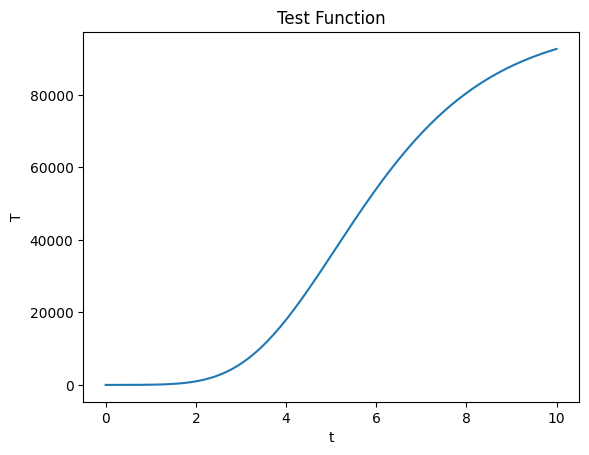

In [5]:
x0 = 1
#k = (1+1/180) # ?? doubles every 180 days, find the rate
t = np.linspace(0,10,130)
Tmax = 100000
T = GompertzFE(t,Tmax,x0)
plt.plot(t,T)
plt.title('Test Function')
plt.xlabel('t')
plt.ylabel('T')
plt.show()

## Breast Cancer Treatment

In [12]:
def GompertzFEfunction(t,Tmax,x0,f,k=.514):
    """ Numerically approximates the x value from IVP: 
    
    T' = k*T*ln(Tmax/T) + f
    
    using the Forward Euler method. 
    Parameters:
        t ((n,)ndarray): The time values
        k (float): The rate of tumor growth
        Tmax (float): The maximum Tumor Burden 
        x0 (float): The initial condition
        f (callable): The nonhomogenous portion (treatment term)
    Returns:
        T ((n,) ndarray): The tumor burden
    """
    # Define h, X and X0 
    ht = abs(t[0] - t[1])
    # Initialize T as all zeros
    T = np.zeros(len(t))
    T[0] = x0
    # Calculate U 
    for j in range(len(t)-1):
        T[j+1] = T[j] + ht*k*T[j]*np.log(Tmax/T[j]) + ht*f(T[j])
    return T

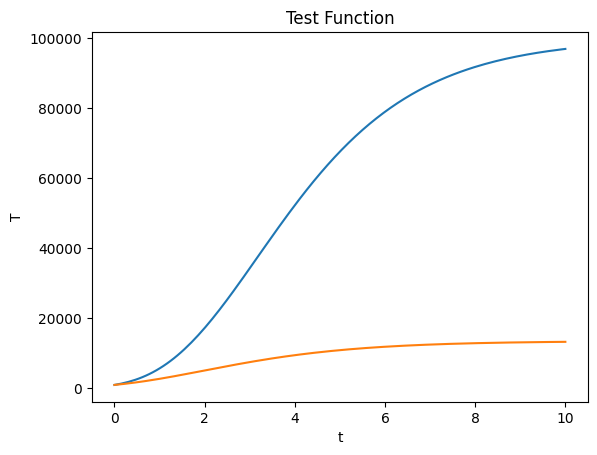

In [17]:
x0 = 1000
k = .5
t = np.linspace(0,10,130)
Tmax = 100000
f = lambda x: -x
Thom = GompertzFE(t,k,Tmax,x0)
T = GompertzFEfunction(t,k,Tmax,x0, f)
plt.plot(t,Thom)
plt.plot(t,T)
plt.title('Test Function')
plt.xlabel('t')
plt.ylabel('T')
plt.show()

In [8]:
def GompertzFEchemo(t,Tmax,x0,lh,mu=.9,k=.514):
    """ Numerically approximates the x value from IVP: 
    
    T' = k*T*ln(Tmax/T) + mu*c(t)*T
    
    using the Forward Euler method. 
    Parameters:
        t ((n,)ndarray): The time values
        k (float): The rate of tumor growth
        Tmax (float): The maximum Tumor Burden 
        x0 (float): The initial condition
        mu (float): fraction of tumor cells killed ~ .9
        lh (float): Half-life of the drug
        gamma (float): drug decay rate ~ ln(2)/halflife
    Returns:
        T ((n,) ndarray): The tumor burden
    """
    gamma = np.log(2)/lh
    c = lambda x: np.exp(-gamma * x)
    # Define h, X and X0 
    ht = abs(t[0] - t[1])
    # Initialize T as all zeros
    T = np.zeros(len(t))
    T[0] = x0
    # Calculate U 
    for j in range(len(t)-1):
        T[j+1] = T[j] + ht*k*T[j]*np.log(Tmax/T[j]) + ht*mu*c(j)*T[j]
    return T

In [7]:
x0 = 1000
k = .514
t = np.linspace(0,10,130)
Tmax = 100000
f = lambda x: -x
mu, gamma = .92/days
Thom = GompertzFE(t,Tmax,x0,k)
T = GompertzFEfunction(t,Tmax,x0,f,k)
plt.plot(t,Thom)
plt.plot(t,T)
plt.title('Test Function')
plt.xlabel('t')
plt.ylabel('T')
plt.show()

NameError: name 'days' is not defined